In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
#examine the data
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [6]:
missing_val_count_by_column = (train_data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


In [7]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
train_data.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


The corr() function shows correlation between the numerical features. It looks like Fare had a slight impact on Survivability

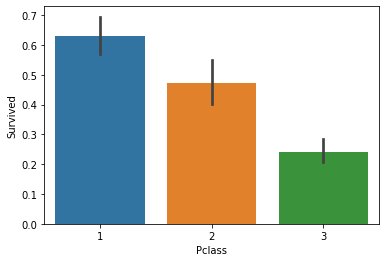

In [9]:
import seaborn as sns
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'])

The Pclass (socio-economic status) also effected survivability positively

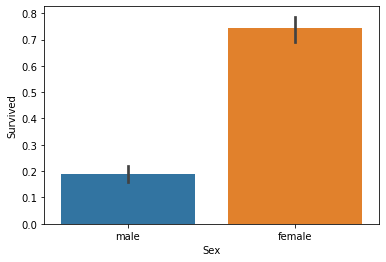

In [10]:
sns.barplot(x =train_data['Sex'] , y =train_data ['Survived'])

In [15]:

#To examine the effect age had on survivability, we need to clean the data
clean_age_data = train_data.copy()
clean_age_data.dropna(subset = ['Age'], axis = 0, inplace= True)

In [26]:
#Set the cut off at 16 instead of 18
clean_age_data['IsAdult'] = cleaned_age_data.Age.map(lambda i : i>16)

In [27]:
clean_age_data['IsAdult']

0      True
1      True
2      True
3      True
4      True
       ... 
885    True
886    True
887    True
889    True
890    True
Name: IsAdult, Length: 714, dtype: bool

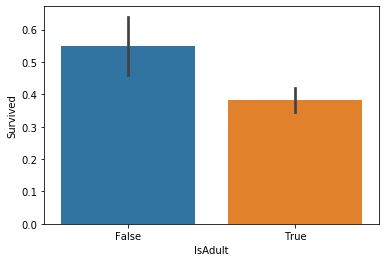

In [28]:
sns.barplot(x =clean_age_data['IsAdult'] , y =clean_age_data ['Survived'])

The greatest difference in rates of survival shown so far is clearly between the gender

In [31]:
clean_age_data['IsRich'] = clean_age_data['Fare'] > 100
#Pclass is similar, but 1st class tickets fares range from around 30 to 514 .So set the cut off to people who possible overpaid to 100

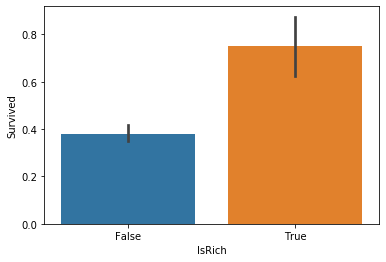

In [32]:
sns.barplot(x =clean_age_data['IsRich'] , y =clean_age_data ['Survived'])

In [56]:
clean_age_data['IsMale'] = clean_age_data['Sex'] == 'male'
test_data['IsMale'] = test_data['Sex'] == 'male' 

Run ML algorithms on just the coloumns - Age, Sex, PClass and Fare. Look at the highest prediction accuracy achieved and then go back to do some more data wrangling - converting alphabateical categorical coloumns to numerical etc

In [59]:
X_train = clean_age_data[['Age', 'IsMale', 'Pclass','Fare']]
Y_train = clean_age_data['Survived']
X_test = test_data[['Age', 'IsMale', 'Pclass', 'Fare']]
print(X_train.shape, Y_train.shape, X_test.shape )

(714, 4) (714,) (418, 4)


In [63]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     332 non-null    float64
 1   IsMale  418 non-null    bool   
 2   Pclass  418 non-null    int64  
 3   Fare    417 non-null    float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 10.3 KB


In [75]:
#test data contains null values, so impute with median
median_age = test_data['Age'].median()
test_data.Age.fillna(median_age, inplace=True)
median_fare = test_data['Fare'].median()
test_data.Fare.fillna(median_fare, inplace = True)

In [76]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   IsMale  418 non-null    bool   
 2   Pclass  418 non-null    int64  
 3   Fare    417 non-null    float64
dtypes: bool(1), float64(2), int64(1)
memory usage: 10.3 KB


In [77]:
X_test = test_data[['Age', 'IsMale', 'Pclass', 'Fare']]

In [83]:
#test data doesnt have the survived coloumn, so we can only look at accuracy on training data
#Using Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_log = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.41

In [84]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

67.23

In [85]:
# K nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.05

In [86]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.31

In [87]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_decision_tree = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.46

In [88]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_random_forest = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.46

In [90]:
# Using decision tree because it has the highest training accuracy
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred_decision_tree
    })
submission.to_csv('submission.csv', index=False)